In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score,LeaveOneOut
from datetime import datetime

In [215]:
class GDPModel:
      def __init__(self):
            data = pd.read_csv("dataset_tn.csv")
            df = pd.DataFrame(data)
            df=data.iloc[:,1:]
            df=data.iloc[:,:]
            df['Year'] = pd.to_datetime(df['Year'], format='%d/%m/%Y')
            df.index = df['Year']
            del df['Year']
            df2=data
            df2.dropna(axis=0, inplace=True)
            df3=df2.iloc[:,1:]
            df3['Year'] = pd.to_datetime(df2['Year'], format='%d/%m/%Y')
            df3.index = df2['Year']
            del df3['Year']
            # Min-Max Scaling for GDP Current Prices
            self.scaler_gdp = MinMaxScaler()
            df3['GDP Current prices'] = self.scaler_gdp.fit_transform(df3[['GDP Current prices']])

            # Robust Scaling for Total Indebtedness
            self.scaler_indebtedness = RobustScaler()
            df3['Total indebtedness'] = self.scaler_indebtedness.fit_transform(df3[['Total indebtedness']])

            # Standardization for Investment Rate
            self.scaler_investment = StandardScaler()
            df3['Investment rate'] = self.scaler_investment.fit_transform(df3[['Investment rate']])

            # Min-Max Scaling for Jobs Creation
            self.scaler_jobs = MinMaxScaler()
            df3['Jobs creation'] = self.scaler_jobs.fit_transform(df3[['Jobs creation']])

            # Robust Scaling for Trade Deficit
            self.scaler_trade_deficit = RobustScaler()
            df3['Trade deficit'] = self.scaler_trade_deficit.fit_transform(df3[['Trade deficit']])
            y=df3['GDP Current prices']
            X=df3.loc[:,'Total indebtedness':'Trade deficit']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
            self.model = LinearRegression()
            self.model.fit(X_train, y_train)
      def predict(self, features):
            data1 = [features]
            columns1 = ['Total indebtedness', 'Investment rate', 'Jobs creation', 'Trade deficit']
            x_test = pd.DataFrame(data1, columns=columns1)
            # Robust Scaling for Total Indebtedness
            x_test['Total indebtedness'] = self.scaler_indebtedness.transform(x_test[['Total indebtedness']])

            # Standardization for Investment Rate
            x_test['Investment rate'] = self.scaler_investment.transform(x_test[['Investment rate']])

            # Min-Max Scaling for Jobs Creation
            x_test['Jobs creation'] = self.scaler_jobs.transform(x_test[['Jobs creation']])

            # Robust Scaling for Trade Deficit
            x_test['Trade deficit'] = self.scaler_trade_deficit.transform(x_test[['Trade deficit']])
            prediction = self.model.predict(x_test)
            print('Before inverse transform:', prediction)
            #reverse normalization
            prediction = self.scaler_gdp.inverse_transform(prediction.reshape(-1, 1))
            return prediction.flatten()[0]
            
                        

Before inverse transform: [0.17324361]
Predicted GDP: 48849.04000246292


In [3]:
data = pd.read_csv("dataset_tn.csv")
data.tail()

,Year,GDP Current prices,Total indebtedness,Investment rate,Jobs creation,Trade deficit
43,31/12/2017,102011.5,156975.0,20.0,43.3,15595.0
44,31/12/2018,112985.5,178955.0,19.6,27.7,19022.9
45,31/12/2019,122969.3,189860.0,19.4,58.8,19436.2
46,31/12/2020,119633.4,203828.0,15.8,-133.0,12830.3
47,31/12/2021,130466.1,217957.0,16.0,53.4,16210.7


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                48 non-null     object 
 1   GDP Current prices  48 non-null     float64
 2   Total indebtedness  21 non-null     float64
 3   Investment rate     23 non-null     float64
 4   Jobs creation       23 non-null     float64
 5   Trade deficit       22 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [161]:
data.describe()

,GDP Current prices,Total indebtedness,Investment rate,Jobs creation,Trade deficit
count,48.000000,21.000000,23.000000,23.000000,22.000000
mean,37927.414583,99776.714286,22.104348,45.143478,9405.150000
std,38083.546182,58329.233007,2.810609,57.536232,5283.340803
min,1547.800000,39132.000000,15.800000,-133.000000,3498.000000
25%,6993.250000,51191.000000,20.400000,43.400000,4256.000000
50%,23885.750000,82303.000000,22.500000,65.000000,8451.000000
75%,60542.825000,133108.000000,23.800000,75.400000,12773.025000
max,130466.100000,217957.000000,26.300000,112.900000,19436.200000


In [4]:
df = pd.DataFrame(data)

In [163]:
sns.set(style="whitegrid")

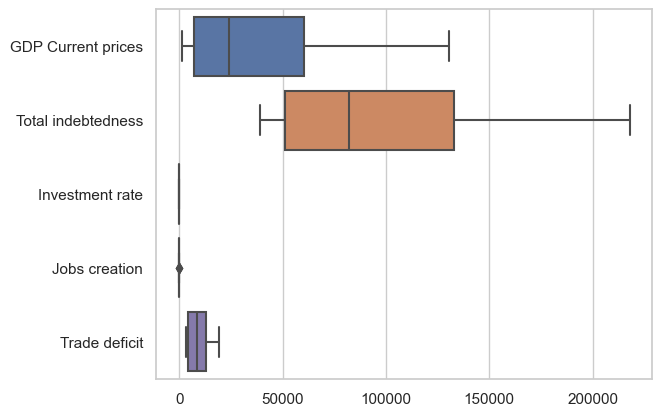

In [164]:
ax = sns.boxplot(data=data, orient="h")

In [165]:
sns.set(style="ticks")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


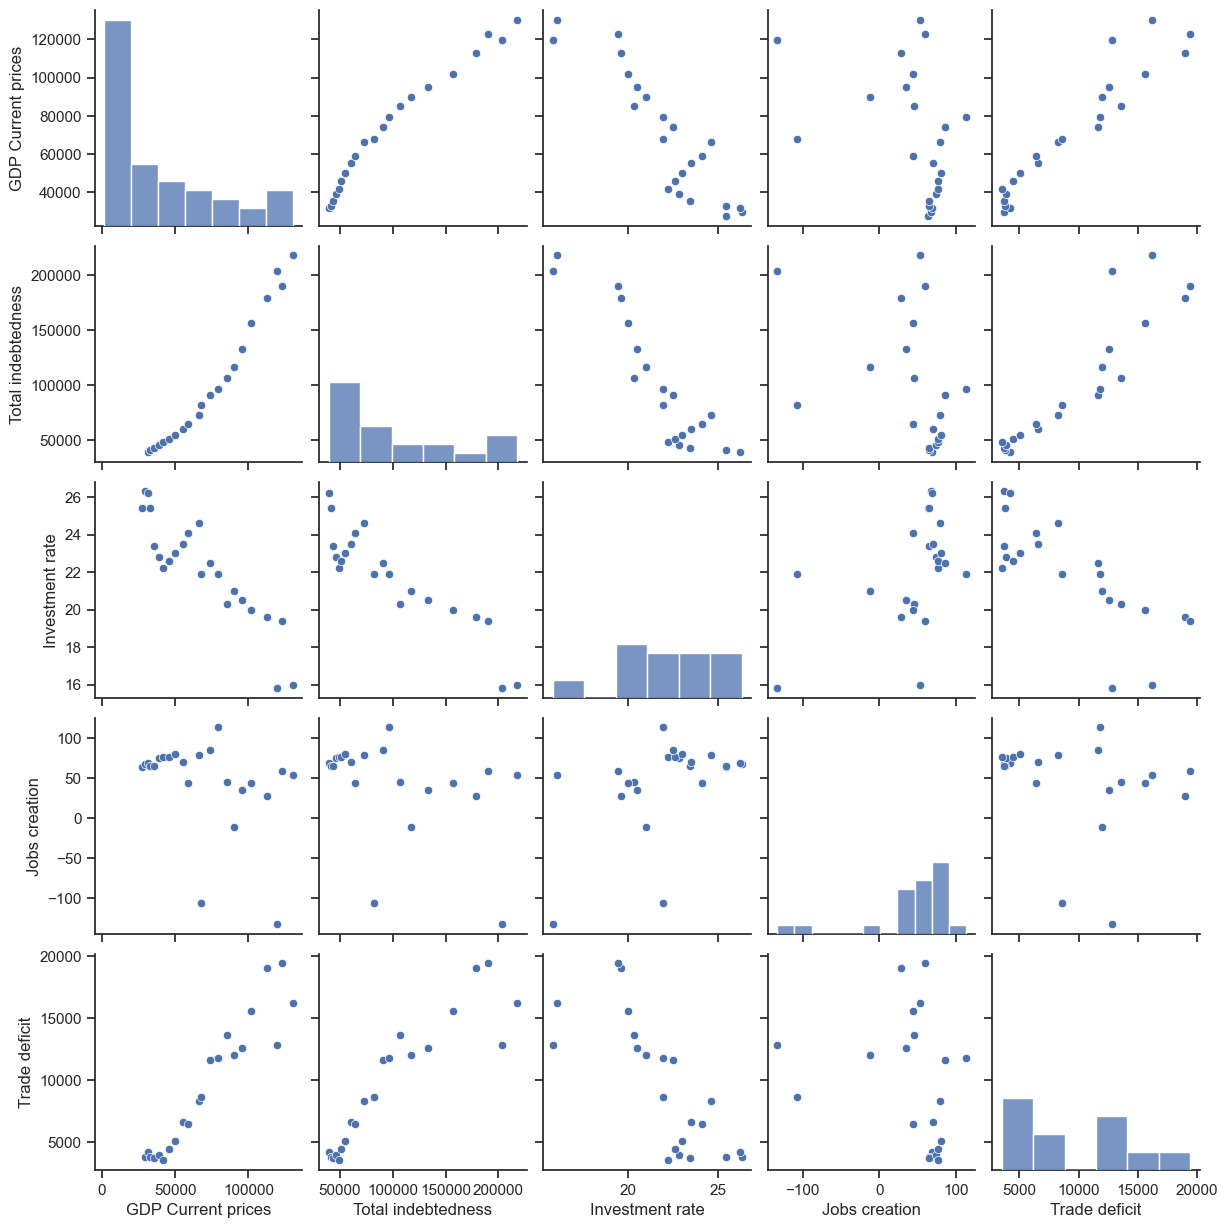

In [166]:
sns.pairplot(data)

In [5]:
df=data.iloc[:,1:]

In [168]:
correlations = df.corr(method='pearson')

<Axes: >

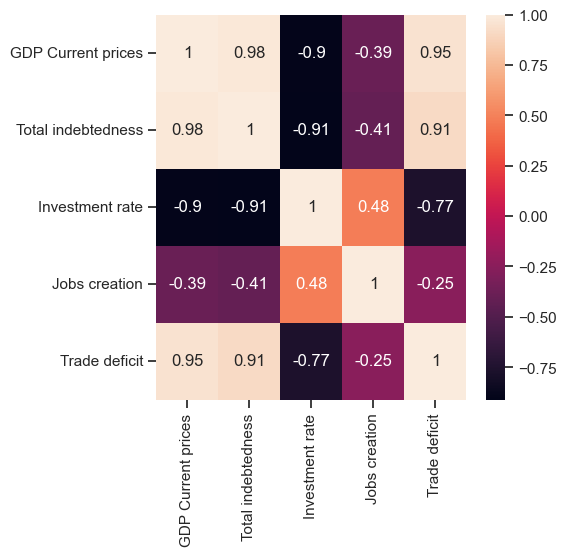

In [169]:
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

### Set the Date as Index

In [6]:
df=data.iloc[:,:]
df['Year'] = pd.to_datetime(df['Year'], format='%d/%m/%Y')
df.index = df['Year']
del df['Year']

### Missing Data Completion

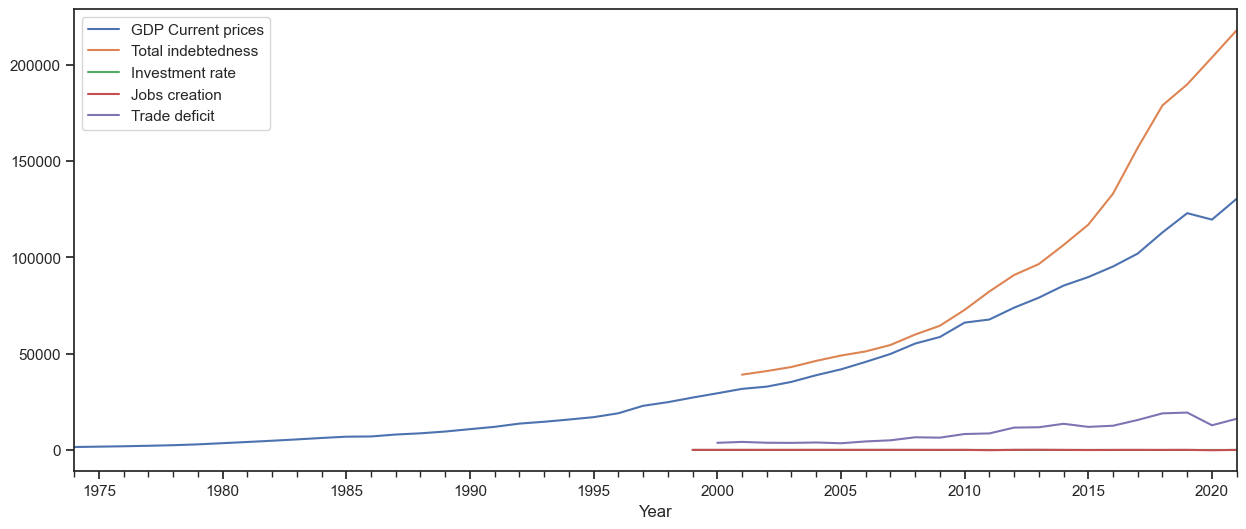

In [171]:
df.plot(figsize=(15, 6))
plt.show()

In [172]:
df_missing = df[df['Investment rate'].isnull()]
df_complete = df[~df['Investment rate'].isnull()]

In [173]:
X_complete = df_complete.index.to_julian_date().values.reshape(-1, 1)
y_complete = df_complete['Investment rate']

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X_complete,y_complete,test_size=0.2,random_state=0)
X_train.shape

(18, 1)

In [175]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
# model.fit(X_complete, y_complete)

Mean Squared Error on Test Set: 3.7011951476131784


In [176]:
# X_missing = df_missing.index.to_julian_date().values.reshape(-1, 1)
# predicted_missing_values = model.predict(X_missing)

In [177]:
# df.loc[df['Investment rate'].isnull(), 'Investment rate'] = predicted_missing_values

In [178]:
# df.plot(figsize=(15, 6))
# plt.show()

In [179]:
df_missing = df[df['Total indebtedness'].isnull()]
df_complete = df[~df['Total indebtedness'].isnull()]
X_complete = df_complete.index.to_julian_date().values.reshape(-1, 1)
y_complete = df_complete['Total indebtedness']
X_train,X_test,y_train,y_test = train_test_split(X_complete,y_complete,test_size=0.2,random_state=0)
X_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
# model.fit(X_complete, y_complete)
# X_missing = df_missing.index.to_julian_date().values.reshape(-1, 1)
# predicted_missing_values = model.predict(X_missing)
# df.loc[df['Total indebtedness'].isnull(), 'Total indebtedness'] = predicted_missing_values
# df.loc[df['Total indebtedness'] < 0, 'Total indebtedness'] = 0

# df.plot(figsize=(15, 6))
# plt.show()

Mean Squared Error on Test Set: 467616919.6058737


In [180]:
df_missing = df[df['Jobs creation'].isnull()]
df_complete = df[~df['Jobs creation'].isnull()]
X_complete = df_complete.index.to_julian_date().values.reshape(-1, 1)
y_complete = df_complete['Jobs creation']
X_train,X_test,y_train,y_test = train_test_split(X_complete,y_complete,test_size=0.2,random_state=0)
X_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
# model.fit(X_complete, y_complete)
# X_missing = df_missing.index.to_julian_date().values.reshape(-1, 1)
# predicted_missing_values = model.predict(X_missing)
# df.loc[df['Jobs creation'].isnull(), 'Jobs creation'] = predicted_missing_values

# df.plot(figsize=(15, 6))
# plt.show()

Mean Squared Error on Test Set: 6337.991221276747


In [181]:
df_missing = df[df['Trade deficit'].isnull()]
df_complete = df[~df['Trade deficit'].isnull()]
X_complete = df_complete.index.to_julian_date().values.reshape(-1, 1)
y_complete = df_complete['Trade deficit']
X_train,X_test,y_train,y_test = train_test_split(X_complete,y_complete,test_size=0.2,random_state=0)
X_train.shape
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
#model.fit(X_complete, y_complete)
#X_missing = df_missing.index.to_julian_date().values.reshape(-1, 1)
#predicted_missing_values = model.predict(X_missing)
#df.loc[df['Trade deficit'].isnull(), 'Trade deficit'] = predicted_missing_values

#df.plot(figsize=(15, 6))
#plt.show()

Mean Squared Error on Test Set: 5870365.500020777


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 1974-12-31 to 2021-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GDP Current prices  48 non-null     float64
 1   Total indebtedness  21 non-null     float64
 2   Investment rate     23 non-null     float64
 3   Jobs creation       23 non-null     float64
 4   Trade deficit       22 non-null     float64
dtypes: float64(5)
memory usage: 2.2 KB


In [183]:
data.describe()

,GDP Current prices,Total indebtedness,Investment rate,Jobs creation,Trade deficit
count,48.000000,21.000000,23.000000,23.000000,22.000000
mean,37927.414583,99776.714286,22.104348,45.143478,9405.150000
std,38083.546182,58329.233007,2.810609,57.536232,5283.340803
min,1547.800000,39132.000000,15.800000,-133.000000,3498.000000
25%,6993.250000,51191.000000,20.400000,43.400000,4256.000000
50%,23885.750000,82303.000000,22.500000,65.000000,8451.000000
75%,60542.825000,133108.000000,23.800000,75.400000,12773.025000
max,130466.100000,217957.000000,26.300000,112.900000,19436.200000


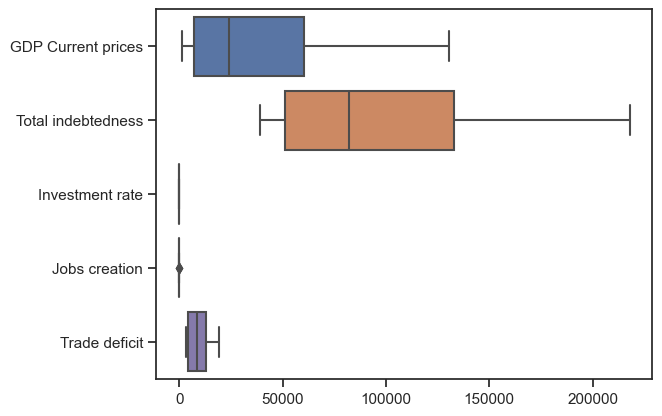

In [184]:
ax = sns.boxplot(data=data, orient="h")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


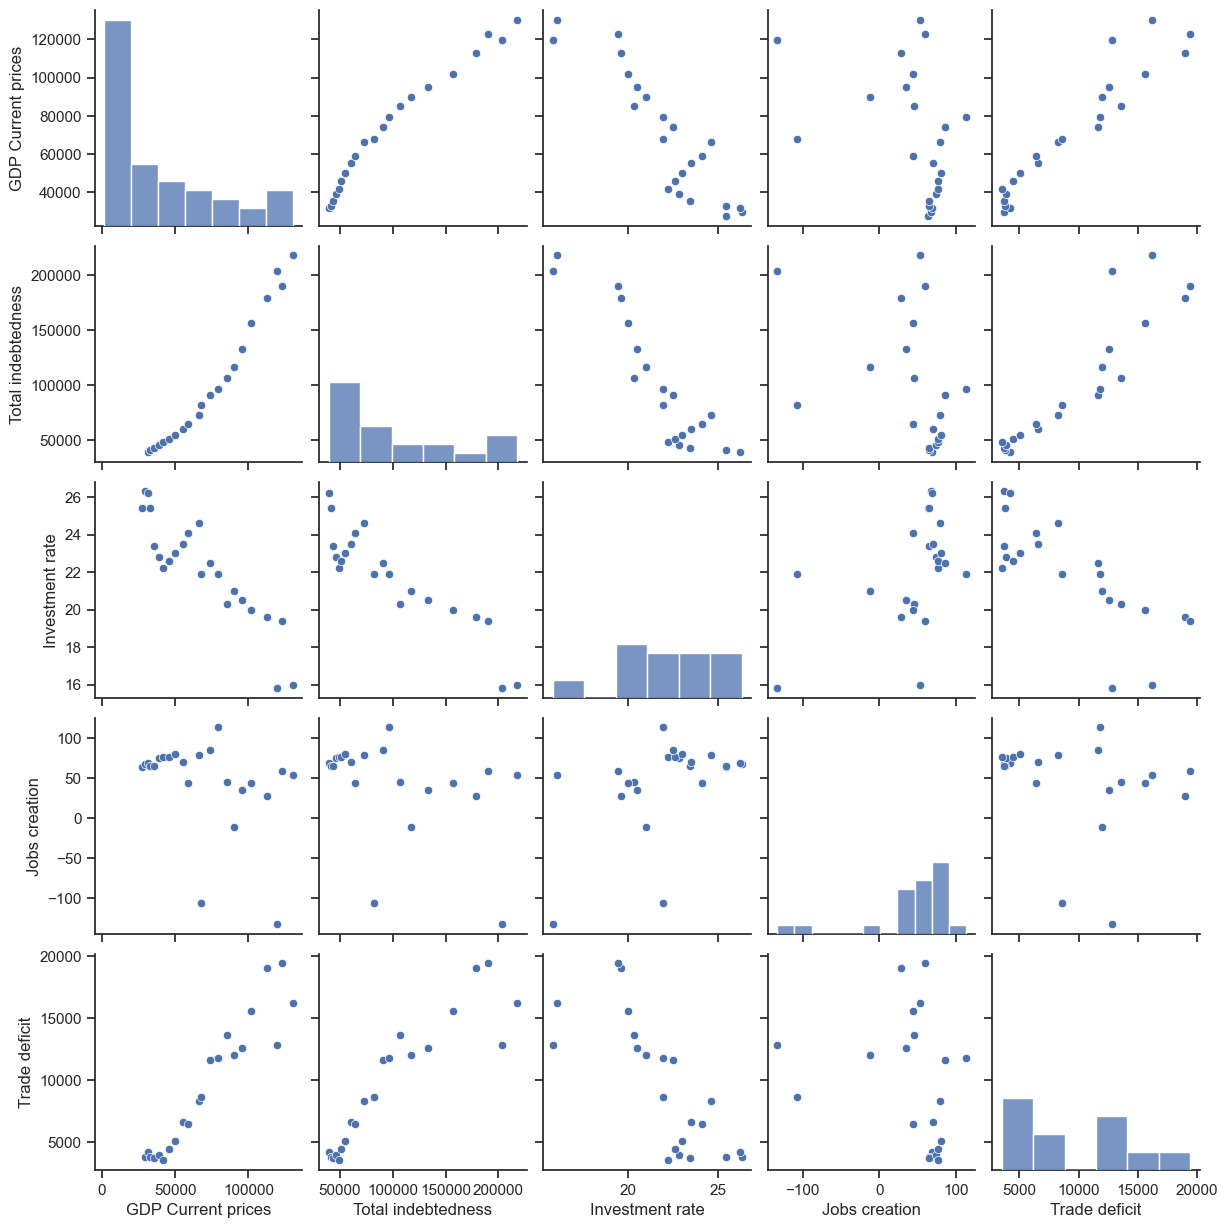

In [185]:
sns.pairplot(df)

<Axes: >

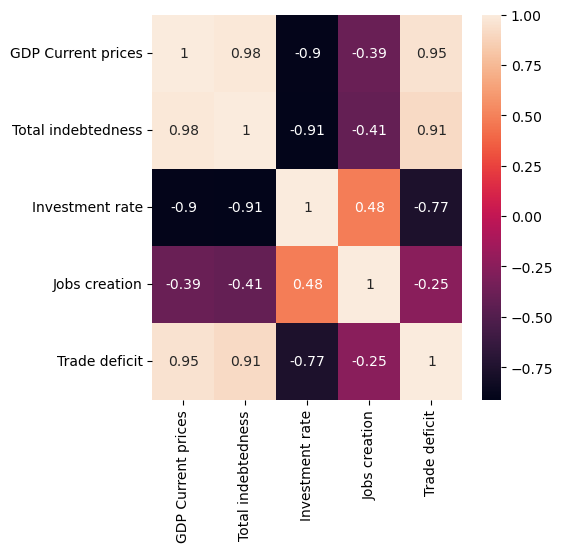

In [7]:
df=data.iloc[:,1:]
correlations = df.corr(method='pearson')
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [8]:
#remove rows with missing data
df2=data
df2.dropna(axis=0, inplace=True)

In [10]:
df2.info()
#save df2 to csv
df2.to_csv('dataset_cleaned_tn.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 27 to 47
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                21 non-null     object 
 1   GDP Current prices  21 non-null     float64
 2   Total indebtedness  21 non-null     float64
 3   Investment rate     21 non-null     float64
 4   Jobs creation       21 non-null     float64
 5   Trade deficit       21 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


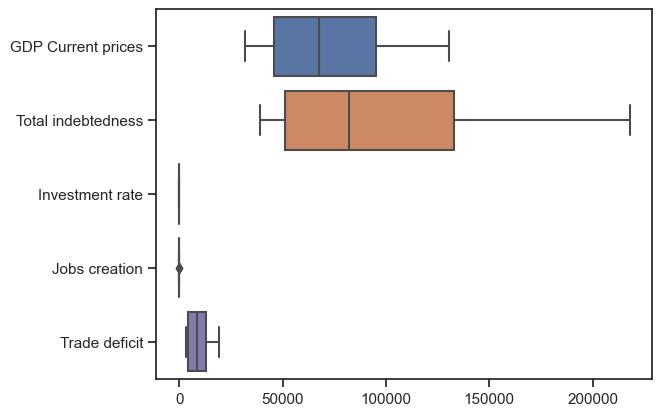

In [189]:
ax = sns.boxplot(df2, orient="h")

<Axes: >

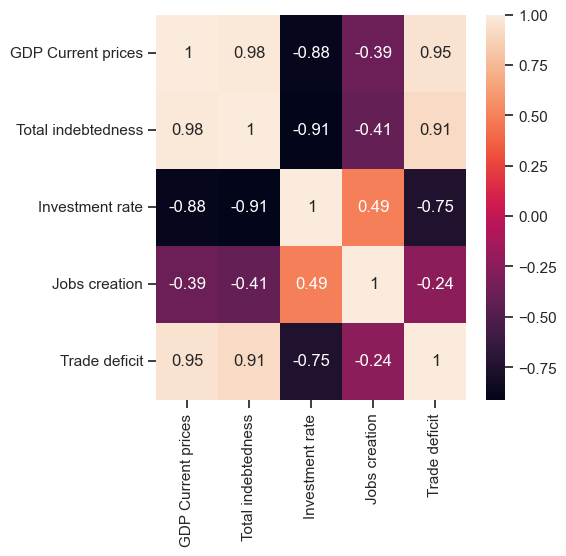

In [190]:
df3=df2.iloc[:,1:]
correlations = df3.corr(method='pearson')
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [191]:
df3['Year'] = pd.to_datetime(df2['Year'], format='%d/%m/%Y')
df3.index = df2['Year']
del df3['Year']
df3

,GDP Current prices,Total indebtedness,Investment rate,Jobs creation,Trade deficit
Year,,,,,
31/12/2001,31746.5,39132.0,26.2,69.0,4193.0
31/12/2002,32901.4,40976.0,25.4,65.0,3762.0
31/12/2003,35373.3,43112.0,23.4,65.0,3696.0
31/12/2004,38838.6,46281.0,22.8,74.4,3905.0
31/12/2005,41871.0,49043.0,22.2,76.5,3498.0
31/12/2006,45756.2,51191.0,22.6,76.4,4445.0
31/12/2007,49857.5,54519.0,23.0,80.2,5027.0
31/12/2008,55267.8,59956.0,23.5,70.3,6604.0
31/12/2009,58677.2,64514.0,24.1,43.5,6409.0


In [192]:
# Min-Max Scaling for GDP Current Prices
scaler_gdp = MinMaxScaler()
df3['GDP Current prices'] = scaler_gdp.fit_transform(df3[['GDP Current prices']])

# Robust Scaling for Total Indebtedness
scaler_indebtedness = RobustScaler()
df3['Total indebtedness'] = scaler_indebtedness.fit_transform(df3[['Total indebtedness']])

# Standardization for Investment Rate
scaler_investment = StandardScaler()
df3['Investment rate'] = scaler_investment.fit_transform(df3[['Investment rate']])

# Min-Max Scaling for Jobs Creation
scaler_jobs = MinMaxScaler()
df3['Jobs creation'] = scaler_jobs.fit_transform(df3[['Jobs creation']])

# Robust Scaling for Trade Deficit
scaler_trade_deficit = RobustScaler()
df3['Trade deficit'] = scaler_trade_deficit.fit_transform(df3[['Trade deficit']])

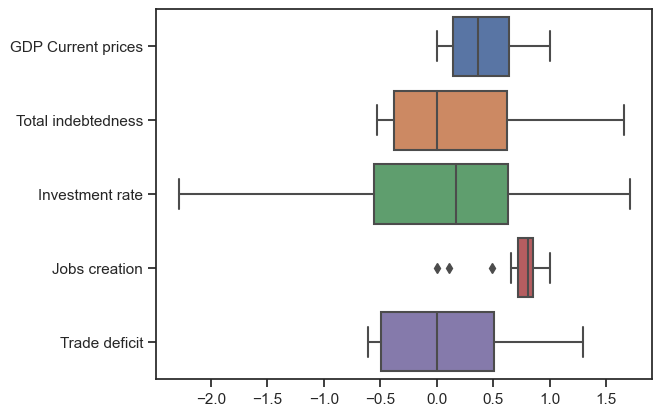

In [193]:
ax = sns.boxplot(df3, orient="h")

<Axes: >

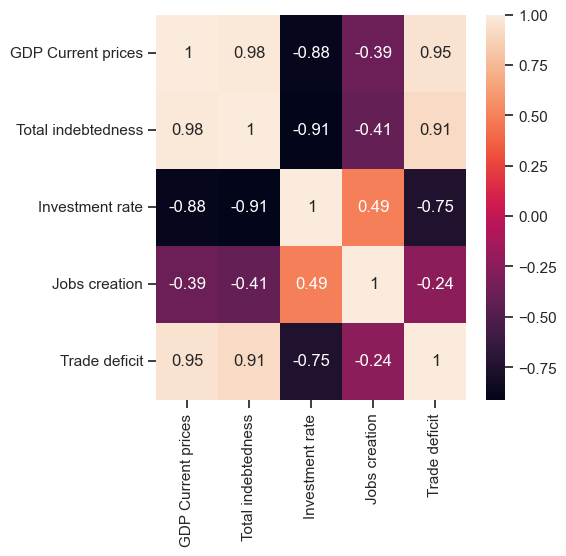

In [194]:
correlations = df3.corr(method='pearson')
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(correlations, annot = True)

In [195]:
y=df3['GDP Current prices']
y

Year
31/12/2001    0.000000
31/12/2002    0.011699
31/12/2003    0.036738
31/12/2004    0.071841
31/12/2005    0.102558
31/12/2006    0.141914
31/12/2007    0.183459
31/12/2008    0.238264
31/12/2009    0.272800
31/12/2010    0.348393
31/12/2011    0.364677
31/12/2012    0.426956
31/12/2013    0.479642
31/12/2014    0.542944
31/12/2015    0.588087
31/12/2016    0.643645
31/12/2017    0.711763
31/12/2018    0.822927
31/12/2019    0.924060
31/12/2020    0.890268
31/12/2021    1.000000
Name: GDP Current prices, dtype: float64

In [196]:
X=df3.loc[:,'Total indebtedness':'Trade deficit']
X

,Total indebtedness,Investment rate,Jobs creation,Trade deficit
Year,,,,
31/12/2001,-0.527009,1.708293,0.821472,-0.526040
31/12/2002,-0.504498,1.401349,0.805205,-0.577439
31/12/2003,-0.478423,0.633987,0.805205,-0.585310
31/12/2004,-0.439738,0.403778,0.843432,-0.560385
31/12/2005,-0.406021,0.173570,0.851972,-0.608923
31/12/2006,-0.379799,0.327042,0.851566,-0.495987
31/12/2007,-0.339173,0.480515,0.867019,-0.426580
31/12/2008,-0.272801,0.672355,0.826759,-0.238513
31/12/2009,-0.217159,0.902564,0.717771,-0.261768


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [198]:
model = LinearRegression()

In [199]:
model.fit(X_train, y_train)

LinearRegression()

In [200]:
loo = LeaveOneOut()
cv_scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores = -cv_scores

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', np.mean(cv_scores))

Cross-Validation Scores: [6.41642240e-03 3.80695127e-03 3.74880279e-03 2.16072700e-03
 3.09201408e-04 5.58695185e-06 8.53966984e-04 1.19807801e-03
 5.11821682e-03 9.98971540e-03 1.26880593e-06 1.05059234e-06
 1.30891027e-03 2.63584079e-04 2.73557538e-03 2.06695444e-03
 1.51637856e-03 9.97573221e-03 3.19179448e-04 3.74535585e-07
 1.51290785e-03]
Mean CV Score: 0.0025385516766683876


In [201]:
y1=df3['GDP Current prices']
y1
X1=df3[['Total indebtedness','Investment rate','Trade deficit']]
X1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model2 = LinearRegression()
model2.fit(X_train, y_train)
#cv
loo = LeaveOneOut()
cv_scores2 = cross_val_score(model2, X, y, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores2 = -cv_scores2

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores2)
print('Mean CV Score:', np.mean(cv_scores2))

Cross-Validation Scores: [6.41642240e-03 3.80695127e-03 3.74880279e-03 2.16072700e-03
 3.09201408e-04 5.58695185e-06 8.53966984e-04 1.19807801e-03
 5.11821682e-03 9.98971540e-03 1.26880593e-06 1.05059234e-06
 1.30891027e-03 2.63584079e-04 2.73557538e-03 2.06695444e-03
 1.51637856e-03 9.97573221e-03 3.19179448e-04 3.74535585e-07
 1.51290785e-03]
Mean CV Score: 0.0025385516766683876


In [202]:
y=df3['GDP Current prices']
y
X=df3[['Total indebtedness','Trade deficit']]
X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)
#cv
loo = LeaveOneOut()
cv_scores3 = cross_val_score(model3, X, y, cv=loo, scoring='neg_mean_squared_error')

# Convert scores to positive values
cv_scores3 = -cv_scores3

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores3)
print('Mean CV Score:', np.mean(cv_scores3))

Cross-Validation Scores: [8.28308691e-03 5.88870738e-03 3.17321919e-03 1.20800917e-03
 8.60036155e-06 1.20576788e-04 8.96024546e-04 1.06532389e-03
 3.05152267e-03 3.92075644e-03 1.19378490e-03 8.97540901e-06
 1.16709285e-03 6.21986345e-04 3.77529332e-03 1.88481655e-03
 2.10438850e-03 1.08650953e-02 1.38678644e-03 1.11102720e-03
 6.61939519e-05]
Mean CV Score: 0.0024667270538797394


In [203]:
X=df3.loc[:,'Total indebtedness':'Trade deficit']
y=df3['GDP Current prices']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_test


,Total indebtedness,Investment rate,Jobs creation,Trade deficit
Year,,,,
31/12/2001,-0.527009,1.708293,0.821472,-0.526040
31/12/2018,1.179877,-0.824000,0.653518,1.242520
31/12/2016,0.620201,-0.478688,0.681985,0.476691


In [204]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.07056611092985475
MSE: 0.00571651789624742
R-squared: 0.9542120766808818


In [214]:
data1 = [[57000, 26, 60, 5500]]
columns1 = ['Total indebtedness', 'Investment rate', 'Jobs creation', 'Trade deficit']

x_test = pd.DataFrame(data1, columns=columns1)

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [206]:
# Robust Scaling for Total Indebtedness
x_test['Total indebtedness'] = scaler_indebtedness.transform(x_test[['Total indebtedness']])

# Standardization for Investment Rate
x_test['Investment rate'] = scaler_investment.transform(x_test[['Investment rate']])

# Min-Max Scaling for Jobs Creation
x_test['Jobs creation'] = scaler_jobs.transform(x_test[['Jobs creation']])

# Robust Scaling for Trade Deficit
x_test['Trade deficit'] = scaler_trade_deficit.transform(x_test[['Trade deficit']])

In [207]:
x_test

,Total indebtedness,Investment rate,Jobs creation,Trade deficit
0,-0.308886,1.631557,0.784872,-0.370172


In [210]:
prediction = model.predict(x_test)
print('Before inverse transform:', prediction)
#reverse normalization
prediction = scaler_gdp.inverse_transform(prediction.reshape(-1, 1))

# Print or use the prediction as needed
print('Predicted GDP:', prediction.flatten()[0])

Before inverse transform: [0.17324361]
Predicted GDP: 48849.04000246292
